In [67]:
import numpy as np
import pandas as pd

# Downloading the dataset from kaggle
I have used google colab for this assignment. I found this to be the fastest way to download the dataset. While checking of the code, if you already have the "IMDB Dataset.csv" file in the same folder as this script is in, you can skip the run of the three code cells following. Sorry for not using **tf.keras.datasets.imdb** to load the IMDB dataset

In [68]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [69]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [70]:
import zipfile
zip_ref = zipfile.ZipFile('/content/imdb-dataset-of-50k-movie-reviews.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Data Preprocessing

In [71]:
df = pd.read_csv('IMDB Dataset.csv')
df = df.to_numpy()

In [72]:
X = df[:, 0]
Y = df[:, 1]

In [73]:
Y = np.array([{'positive': 1, 'negative': 0}[value] for value in Y]).reshape(-1, 1)

In [74]:
import string
for i in range(len(X)):
    X[i] = X[i].lower().replace("<br />", "").translate(str.maketrans('', '', string.punctuation))

In [75]:
from tensorflow.keras.preprocessing.text import Tokenizer #type:ignore

tokenizer = Tokenizer(oov_token = 'OOV', num_words = 100000)
tokenizer.fit_on_texts(X)
tokenized_reviews = tokenizer.texts_to_sequences(X)

In [76]:
from tensorflow.keras.preprocessing.sequence import pad_sequences #type:ignore
padded_reviews = pad_sequences(tokenized_reviews, maxlen = 100, padding = 'post')
X = padded_reviews

In [77]:
x_train, y_train = X[:40000], Y[:40000]
x_val, y_val = X[40000:45000], Y[40000:45000]
x_test, y_test = X[45000:], Y[45000:]

# Building the model

In [78]:
from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout #type:ignore
from tensorflow.keras.regularizers import l2 #type:ignore


model = Sequential([
    Embedding(100000, 50, input_length=100),

    LSTM(64),

    Dense(1, activation='sigmoid')
])


model.compile(
    loss =  'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 50)           5000000   
                                                                 
 lstm_4 (LSTM)               (None, 64)                29440     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5029505 (19.19 MB)
Trainable params: 5029505 (19.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
history = model.fit(x_train, y_train, epochs = 3, validation_data=(x_val, y_val))

Epoch 1/3
1250/1250 [==============================] - 152s 119ms/step - loss: 0.3991 - accuracy: 0.8199 - val_loss: 0.3401 - val_accuracy: 0.8560
Epoch 2/3
1250/1250 [==============================] - 146s 117ms/step - loss: 0.2075 - accuracy: 0.9225 - val_loss: 0.3682 - val_accuracy: 0.8518
Epoch 3/3
1250/1250 [==============================] - 143s 114ms/step - loss: 0.1189 - accuracy: 0.9594 - val_loss: 0.4216 - val_accuracy: 0.8554


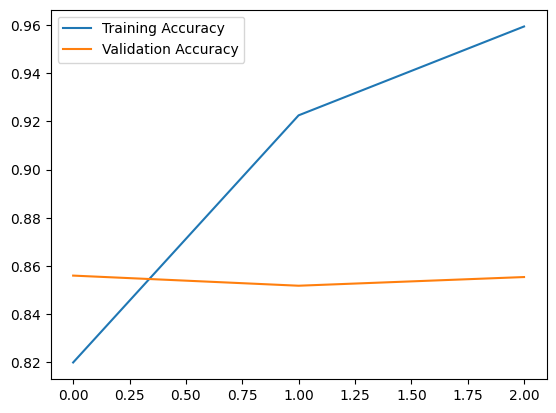

In [81]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

# Preparing custom tests

In [82]:
custom_test = np.array([
    "What a wonderful experience. The visuals were stunning.",
    "Not my cup of tea. The movie was too slow and uninteresting.",
    "Loved every minute of it. A masterpiece!",
    "Awful movie. Worst I have seen in years.",
    "It was okay, not great but not terrible either.",
    "I would not recommend anyone this movie. It's just a waste of time.",
    "This is a fantastic movie with great acting and a compelling story.",
    "I did not enjoy the film. The plot was boring and predictable.",
    "An excellent movie. Highly recommended!",
    "Terrible movie. I walked out halfway through.",
    "A decent film with some good moments but overall forgettable."
])

new = np.arange(0, len(custom_test))

for i in range(len(custom_test)):
    custom_test[i] = custom_test[i].lower().replace("<br />", "").translate(str.maketrans('', '', string.punctuation))

custom_test = tokenizer.texts_to_sequences(custom_test)
custom_test = pad_sequences(custom_test, maxlen = 100, padding = 'post')

In [83]:
prediction = np.round(model.predict(custom_test))
_prediction_ = ['positive' if value == 1 else 'negative' for value in prediction]

1/1 [==============================] - 0s 413ms/step


In [84]:
_prediction_

['positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative']